<a href="https://colab.research.google.com/github/rohankavari/MachineLearning/blob/main/Logistic_Regression_balanced.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [43]:
!pip install -U scikit-learn

Requirement already up-to-date: scikit-learn in /usr/local/lib/python3.7/dist-packages (0.24.2)


In [44]:
import pandas as pd
from sklearn.linear_model import LogisticRegression,LogisticRegressionCV
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix , roc_curve , auc
from sklearn import metrics
import sklearn

In [45]:
from sklearn.datasets import load_iris
data= load_iris()
x=data.data
y=data.target
target_names=data.target_names

In [46]:
data.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

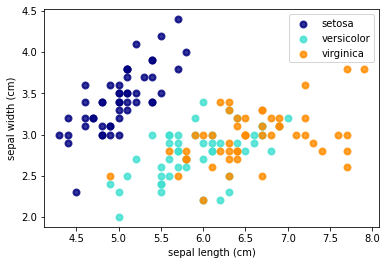

In [47]:
colors = ['navy', 'turquoise', 'darkorange']
lw = 2

for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(x[y == i, 0], x[y == i, 1], color=color, alpha=.8, lw=lw, label=target_name)
    plt.legend()
    plt.xlabel(data.feature_names[0])
    plt.ylabel(data.feature_names[1])

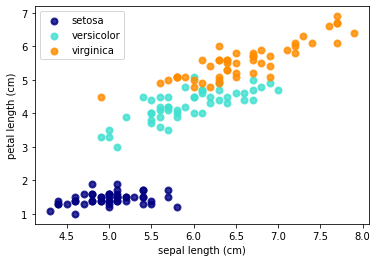

In [48]:
for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(x[y == i, 0], x[y == i, 2], color=color, alpha=.8, lw=lw, label=target_name)
    plt.legend()
    plt.xlabel(data.feature_names[0])
    plt.ylabel(data.feature_names[2])

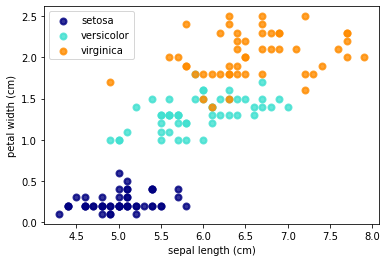

In [49]:
for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(x[y == i, 0], x[y == i, 3], color=color, alpha=.8, lw=lw, label=target_name)
    plt.legend()
    plt.xlabel(data.feature_names[0])
    plt.ylabel(data.feature_names[3])

In [62]:
np.unique(y,return_counts=True)

(array([0, 1, 2]), array([50, 50, 50]))

as the class distribution is 1:1:1, we will keep the same distribution for out test and train sets by uing the stratify argument in train test split.

In [52]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42,stratify=y)

In [53]:
np.unique(y_train,return_counts=True)

(array([0, 1, 2]), array([40, 40, 40]))

In [54]:
np.unique(y_test,return_counts=True)

(array([0, 1, 2]), array([10, 10, 10]))

As the classes are balanced,we will be using plain logitic regression

In [56]:
model=LogisticRegression(penalty='none',solver="newton-cg")
model.fit(x_train,y_train)
y_pred=model.predict(x_train)

In [58]:
confusion_matrix(y_train, y_pred)

array([[40,  0,  0],
       [ 0, 39,  1],
       [ 0,  1, 39]])

In [59]:
y_final=model.predict(x_test)

In [61]:
confusion_matrix(y_test, y_final)

array([[10,  0,  0],
       [ 0, 10,  0],
       [ 0,  0, 10]])